In [1]:
# Ran once and formed the \data1\split folder.
# import os
# import shutil
# import random

# # Define data directory
# data_dir = "data1/Indian-monuments/images"
# train_dir = "data1/split/Indian-monuments/images/train"
# val_dir = "data1/split/Indian-monuments/images/validation"
# test_dir = "data1/split/Indian-monuments/images/test"

# # Create directories for train, validation, and test sets if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Define the ratio for splitting the data
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1

# # Get the list of class directories
# class_directories = [
#     directory
#     for directory in os.listdir(data_dir)
#     if os.path.isdir(os.path.join(data_dir, directory))
# ]

# # Iterate over each class directory
# for class_dir in class_directories:
#     # Get the list of image filenames for the current class
#     class_images = os.listdir(os.path.join(data_dir, class_dir))
#     # Shuffle the list of image filenames
#     random.shuffle(class_images)

#     # Calculate the number of images for each subset
#     num_train = int(len(class_images) * train_ratio)
#     num_val = int(len(class_images) * val_ratio)
#     num_test = len(class_images) - num_train - num_val

#     # Split the images into train, validation, and test sets
#     train_images = class_images[:num_train]
#     val_images = class_images[num_train : num_train + num_val]
#     test_images = class_images[num_train + num_val :]

#     # Copy images to their respective directories
#     for image in train_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(train_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in val_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(val_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in test_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(test_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

# # Now you can use the directories train_dir, val_dir, and test_dir for training, validation, and testing respectively.

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [3]:
train_dir = Path("data1/split/Indian-monuments/images/train")
train_filepaths = (
    list(train_dir.glob("**/*.jpg"))
    + list(train_dir.glob("*.jpeg"))
    + list(train_dir.glob("*.png"))
)
val_dir = Path("data1/split/Indian-monuments/images/validation")
val_filepaths = (
    list(val_dir.glob("**/*.jpg"))
    + list(val_dir.glob("*.jpeg"))
    + list(val_dir.glob("*.png"))
)
test_dir = Path("data1/split/Indian-monuments/images/test")
test_filepaths = (
    list(test_dir.glob("**/*.jpg"))
    + list(test_dir.glob("*.jpeg"))
    + list(test_dir.glob("*.png"))
)

In [4]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]
    print(labels)
    filepath = pd.Series(filepath, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df


train_df = proc_img(train_filepaths)
val_df = proc_img(val_filepaths)
test_df = proc_img(test_filepaths)

['Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta

In [5]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [9]:
unique_labels = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
train_df["Label"].nunique()

24

In [10]:
val_df["Label"].nunique()

24

In [11]:
test_df["Label"].nunique()

24

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

# Define data generators with preprocessing function for MobileNetV2
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

val_images = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

base_model = MobileNetV2(
    weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3)
)
base_model.trainable = False


# adding custom head

x = base_model.output
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(train_df["Label"].nunique(), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_images, validation_data=val_images, epochs=10, verbose=1)

Found 2488 validated image filenames belonging to 24 classes.
Found 308 validated image filenames belonging to 24 classes.
Found 322 validated image filenames belonging to 24 classes.
Epoch 1/10


C:\Users\CHARVI UPRETI\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.4497 - loss: 2.0607 - val_accuracy: 0.8539 - val_loss: 0.5042
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 443ms/step - accuracy: 0.9364 - loss: 0.2814 - val_accuracy: 0.9091 - val_loss: 0.3128
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 439ms/step - accuracy: 0.9785 - loss: 0.1092 - val_accuracy: 0.9318 - val_loss: 0.2875
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 415ms/step - accuracy: 0.9888 - loss: 0.0628 - val_accuracy: 0.9253 - val_loss: 0.2969
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 420ms/step - accuracy: 0.9942 - loss: 0.0335 - val_accuracy: 0.9253 - val_loss: 0.2429
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 405ms/step - accuracy: 0.9952 - loss: 0.0261 - val_accuracy: 0.9253 - val_loss: 0.3207
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 33s 398ms/step - accuracy: 0.9967 - loss: 0.0188 - val_accuracy: 0.9318 - val_loss: 0.2747
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 392ms/step - accuracy: 0.9986 - loss: 0.0094 - val_accuracy: 0.931

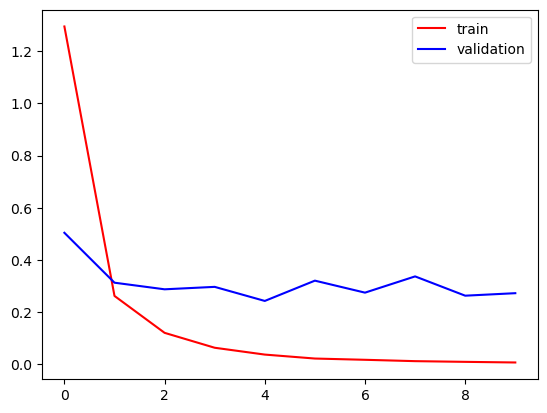

In [13]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

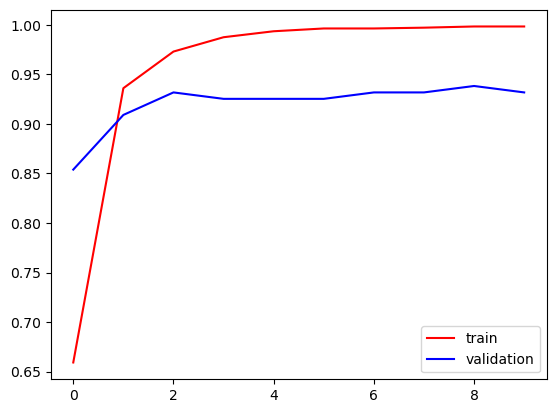

In [14]:
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

In [15]:
predicted_labels = model.predict(test_images)
label_mapping = {v: k for k, v in train_images.class_indices.items()}

# Convert predicted labels to class names
predicted_classes = [label_mapping[np.argmax(label)] for label in predicted_labels]

# Convert true labels to class names
true_classes = [label_mapping[label] for label in test_images.labels]

for i in range(10):
    print(f"True label: {true_classes[i]}, Predicted label: {predicted_classes[i]}")

from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {100 * acc:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step
True label: iron_pillar, Predicted label: iron_pillar
True label: golden temple, Predicted label: golden temple
True label: jamali_kamali_tomb, Predicted label: tajmahal
True label: Ajanta Caves, Predicted label: Ajanta Caves
True label: Fatehpur Sikri, Predicted label: Fatehpur Sikri
True label: Gateway of India, Predicted label: Gateway of India
True label: qutub_minar, Predicted label: qutub_minar
True label: Humayun_s Tomb, Predicted label: Humayun_s Tomb
True label: mysore_palace, Predicted label: mysore_palace
True label: victoria memorial, Predicted label: victoria memorial
Accuracy: 96.27%


In [16]:
# Define the file path to save the predicted classes
output_file = "predicted_classes.txt"

# Write the predicted classes to the file
with open(output_file, "w") as file:
    for predicted_class in predicted_classes:
        file.write(predicted_class + "\n")

print("Predicted classes saved to", output_file)

Predicted classes saved to predicted_classes.txt


In [17]:
model.save(f"model_with_mobilenetv2_{100 * acc:.2f}.h5")

In [18]:
import keras


keras.saving.save_model(model, f"model_with_mobilenetv2_{100 * acc:.2f}.keras")

In [19]:
import pickle

with open("label_mapping.pkl", "wb") as f:
    pickle.dump(label_mapping, f)

print("Label mapping saved successfully.")

Label mapping saved successfully.
